In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
from os import walk
import csv

import sys
from PIL import Image
import scipy as sc
import gdal
import math
from scipy.interpolate import interp1d
import os
import scipy

# Constants

# Base paths

In [3]:
base_path = '' 

# Data

In [4]:
# -- data S(Q) eHDA, running number of experiment
plot_runs1 = np.array([300,301,302,303,304])
T1 = '110K'

plot_runs2 = np.array([320,321,322,323,324])
T2 = '118K'

plot_runs3 = np.array([325,326,327,328,329])
T3 = '120K'

plot_runs4 = np.array([330,331,332,333,334])
T4 = '122K'

plot_runs5 = np.array([335,336,337,338,339])
T5 = '124K'

plot_runs6 = np.array([350,351,352,353,354])
T6 = '128K'

iq1,iq2=106,146

# import file

In [6]:
files = []
i=0
for (dirpath, dirnames, filenames) in walk(base_path):
    files.extend(filenames)
    break

dat_files = np.array([])
run_num = np.array([])
for ifile in files:
    dat_files = np.append(dat_files,ifile)
    run_num = np.append(run_num,int(ifile[-3:]))

i=0
file_name = dat_files[run_num==plot_runs1[i]][0]
data = np.transpose(np.loadtxt(base_path+file_name))
q = np.array(data[0])
Sq0 = data[1]

print q
print data.shape

Sq1 = np.zeros([len(plot_runs1),len(Sq0)])
for i in range(len(plot_runs1)):
    file_name = dat_files[run_num==plot_runs1[i]][0]
    data1 = np.transpose(np.loadtxt(base_path+file_name))
    Sq1[i] = data1[1]
    
Sq2 = np.zeros([len(plot_runs2),len(Sq0)])
for i in range(len(plot_runs2)):
    file_name = dat_files[run_num==plot_runs2[i]][0]
    data2 = np.transpose(np.loadtxt(base_path+file_name))
    Sq2[i] = data2[1]    

Sq3 = np.zeros([len(plot_runs3),len(Sq0)])
for i in range(len(plot_runs3)):
    file_name = dat_files[run_num==plot_runs3[i]][0]
    data3 = np.transpose(np.loadtxt(base_path+file_name))
    Sq3[i] = data3[1]  

Sq4 = np.zeros([len(plot_runs4),len(Sq0)])
for i in range(len(plot_runs4)):
    file_name = dat_files[run_num==plot_runs4[i]][0]
    data4 = np.transpose(np.loadtxt(base_path+file_name))
    Sq4[i] = data4[1]  

Sq5 = np.zeros([len(plot_runs5),len(Sq0)])
for i in range(len(plot_runs5)):
    file_name = dat_files[run_num==plot_runs5[i]][0]
    data5 = np.transpose(np.loadtxt(base_path+file_name))
    Sq5[i] = data5[1]  

Sq6 = np.zeros([len(plot_runs6),len(Sq0)])
for i in range(len(plot_runs6)):
    file_name = dat_files[run_num==plot_runs6[i]][0]
    data6 = np.transpose(np.loadtxt(base_path+file_name))
    Sq6[i] = data6[1]  
    
print len(plot_runs1)

[  0.65   0.66   0.67 ...,  22.97  22.98  22.99]
(2, 2235)
5


# plot data

<Figure size 432x288 with 0 Axes>

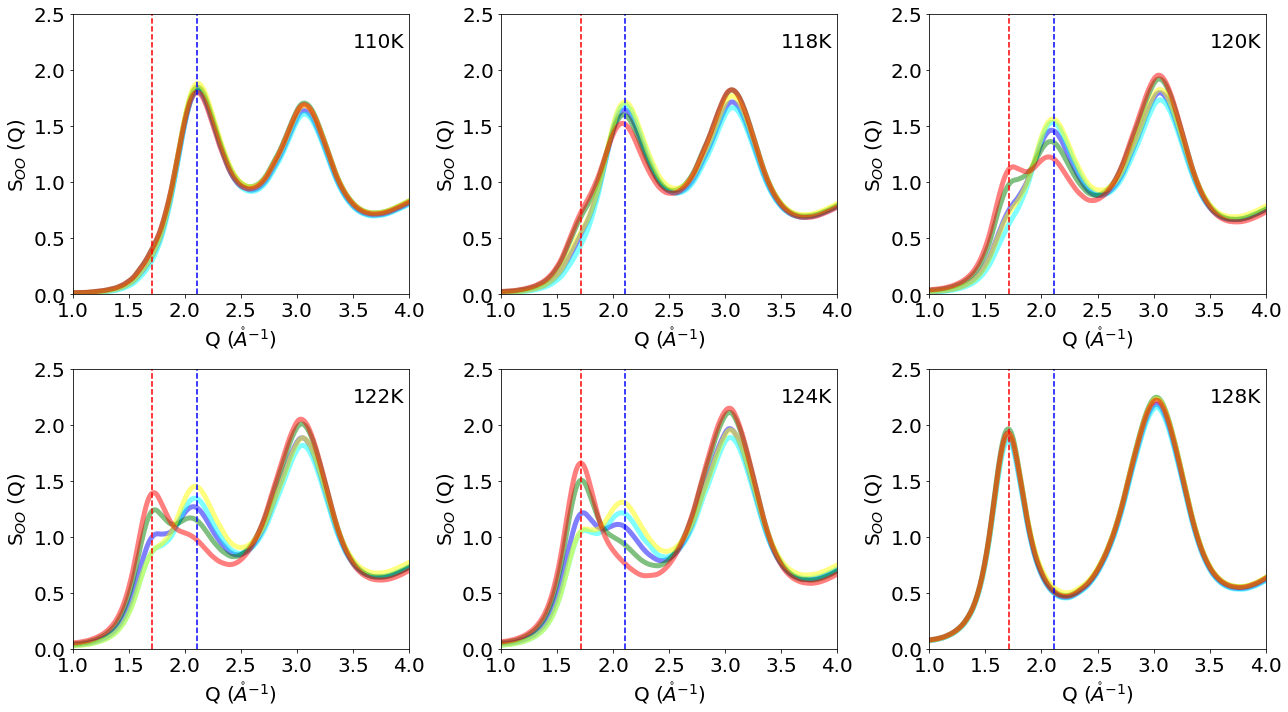

In [12]:
plt.figure()
plt.figure(figsize = (18,10))

#---------------------------------------------------------
# --plot S(Q)
ax1 = plt.subplot(2,3,1)

plt.plot(q,Sq1[0],alpha=0.5,linewidth=5,color="blue")
plt.plot(q,Sq1[1],alpha=0.5,linewidth=5,color="cyan")
plt.plot(q,Sq1[2],alpha=0.5,linewidth=5,color="green")
plt.plot(q,Sq1[3],alpha=0.5,linewidth=5,color="yellow")
plt.plot(q,Sq1[4],alpha=0.5,linewidth=5,color="red")
    
plt.xlabel('Q ($\mathring{A}^{-1}$)', fontsize=20)
plt.ylabel('S$_{OO}$ (Q)', fontsize=20)
plt.xlim([1,4])
plt.ylim([0,2.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(3.5,2.2,T1,fontsize=20)

plt.axvline(x=q[iq1],ymin=0,ymax=10000,c="red",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq1])
plt.axvline(x=q[iq2],ymin=0,ymax=10000,c="blue",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq2])

#----------------------------------------------------------
plt.subplot(2,3,2)

plt.plot(q,Sq2[0],alpha=0.5,linewidth=5,color="blue")
plt.plot(q,Sq2[1],alpha=0.5,linewidth=5,color="cyan")
plt.plot(q,Sq2[2],alpha=0.5,linewidth=5,color="green")
plt.plot(q,Sq2[3],alpha=0.5,linewidth=5,color="yellow")
plt.plot(q,Sq2[4],alpha=0.5,linewidth=5,color="red")
    
                 
plt.xlabel('Q ($\mathring{A}^{-1}$)', fontsize=20)
plt.ylabel('S$_{OO}$ (Q)', fontsize=20)
plt.xlim([1,4])
plt.ylim([0,2.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(3.5,2.2,T2,fontsize=20)

plt.axvline(x=q[iq1],ymin=0,ymax=10000,c="red",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq1])
plt.axvline(x=q[iq2],ymin=0,ymax=10000,c="blue",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq2])

#----------------------------------------------------------
plt.subplot(2,3,3)

plt.plot(q,Sq3[0],alpha=0.5,linewidth=5,color="blue")
plt.plot(q,Sq3[1],alpha=0.5,linewidth=5,color="cyan")
plt.plot(q,Sq3[2],alpha=0.5,linewidth=5,color="green")
plt.plot(q,Sq3[3],alpha=0.5,linewidth=5,color="yellow")
plt.plot(q,Sq3[4],alpha=0.5,linewidth=5,color="red")
    
                 
plt.xlabel('Q ($\mathring{A}^{-1}$)', fontsize=20)
plt.ylabel('S$_{OO}$ (Q)', fontsize=20)
plt.xlim([1,4])
plt.ylim([0,2.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(3.5,2.2,T3,fontsize=20)

plt.axvline(x=q[iq1],ymin=0,ymax=10000,c="red",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq1])
plt.axvline(x=q[iq2],ymin=0,ymax=10000,c="blue",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq2])

#----------------------------------------------------------
plt.subplot(2,3,4)

plt.plot(q,Sq4[0],alpha=0.5,linewidth=5,color="blue")
plt.plot(q,Sq4[1],alpha=0.5,linewidth=5,color="cyan")
plt.plot(q,Sq4[2],alpha=0.5,linewidth=5,color="green")
plt.plot(q,Sq4[3],alpha=0.5,linewidth=5,color="yellow")
plt.plot(q,Sq4[4],alpha=0.5,linewidth=5,color="red")
    
                 
plt.xlabel('Q ($\mathring{A}^{-1}$)', fontsize=20)
plt.ylabel('S$_{OO}$ (Q)', fontsize=20)
plt.xlim([1,4])
plt.ylim([0,2.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(3.5,2.2,T4,fontsize=20)

plt.axvline(x=q[iq1],ymin=0,ymax=10000,c="red",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq1])
plt.axvline(x=q[iq2],ymin=0,ymax=10000,c="blue",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq2])

#----------------------------------------------------------
plt.subplot(2,3,5)

plt.plot(q,Sq5[0],alpha=0.5,linewidth=5,color="blue")
plt.plot(q,Sq5[1],alpha=0.5,linewidth=5,color="cyan")
plt.plot(q,Sq5[2],alpha=0.5,linewidth=5,color="green")
plt.plot(q,Sq5[3],alpha=0.5,linewidth=5,color="yellow")
plt.plot(q,Sq5[4],alpha=0.5,linewidth=5,color="red")
    
                 
plt.xlabel('Q ($\mathring{A}^{-1}$)', fontsize=20)
plt.ylabel('S$_{OO}$ (Q)', fontsize=20)
plt.xlim([1,4])
plt.ylim([0,2.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(3.5,2.2,T5,fontsize=20)

plt.axvline(x=q[iq1],ymin=0,ymax=10000,c="red",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq1])
plt.axvline(x=q[iq2],ymin=0,ymax=10000,c="blue",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq2])

#----------------------------------------------------------
plt.subplot(2,3,6)

plt.plot(q,Sq6[0],alpha=0.5,linewidth=5,color="blue")
plt.plot(q,Sq6[1],alpha=0.5,linewidth=5,color="cyan")
plt.plot(q,Sq6[2],alpha=0.5,linewidth=5,color="green")
plt.plot(q,Sq6[3],alpha=0.5,linewidth=5,color="yellow")
plt.plot(q,Sq6[4],alpha=0.5,linewidth=5,color="red")
    
                 
plt.xlabel('Q ($\mathring{A}^{-1}$)', fontsize=20)
plt.ylabel('S$_{OO}$ (Q)', fontsize=20)
plt.xlim([1,4])
plt.ylim([0,2.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(3.5,2.2,T6,fontsize=20)

plt.axvline(x=q[iq1],ymin=0,ymax=10000,c="red",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq1])
plt.axvline(x=q[iq2],ymin=0,ymax=10000,c="blue",linewidth=1.5,linestyle='--',label = 'Q = %.2f $\mathring{A}^{-1}$'%q[iq2])

plt.tight_layout()


plt.show()